# Spam classifer with Natural Language processing and Naive Bayes

## Libaries importing

In [46]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, average_precision_score, precision_recall_curve, plot_precision_recall_curve, recall_score
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords

from typing import Dict, List
from io import BytesIO
import requests
import tarfile
import glob
import re

## Importing datasets

In [2]:
spam_ham_sms = pd.read_csv("datasets/sms(ham-spam).csv").drop("Unnamed: 0", axis=1)
spam_ham_sms.sample(3)

,labels,messages
5208,ham,Hi.what you think about match?
922,ham,On ma way to school. Can you pls send me ashle...
1901,ham,And miss vday the parachute and double coins??...


In [24]:
def extract_spam_data():
    Base_url = "https://spamassassin.apache.org/old/publiccorpus"

    files = ["20021010_easy_ham.tar.bz2",
             "20021010_hard_ham.tar.bz2",            
             "20021010_spam.tar.bz2"]

    Output_dir = "datasets/emailSpam"

    for filename in files:
        content = requests.get(f"{Base_url}/{filename}").content
        fin = BytesIO(content)

        with tarfile.open(fileobj=fin, mode='r:bz2') as tf:
            tf.extractall(Output_dir)

    return files

In [25]:
files = extract_spam_data()

In [3]:
path = "datasets\emailSpam\*\*"

full_data:List[Dict] = []

for filename in glob.glob(path):
    spamOrham = "spam" in filename
    if spamOrham:
        with open(filename, errors='ignore') as files:
            for line in files:
                if line.startswith("Subject:"):
                    subject = line.lstrip("Subject: ")
                    data = {"labels": "spam", "messages": subject}
                    full_data.append(data)

In [4]:
spam_ham_email = pd.DataFrame(data = full_data, columns=['labels', 'messages'])
spam_ham_email.sample(3)

,labels,messages
415,spam,"Re: PROTECT YOUR COMPUTER,YOU NEED SYSTEMWORKS..."
276,spam,iiu.taint.org\n
21,spam,[ILUG] BUSINESS\n


In [5]:
data = pd.concat([spam_ham_email, spam_ham_sms])

### Visualising data -> Balance or not

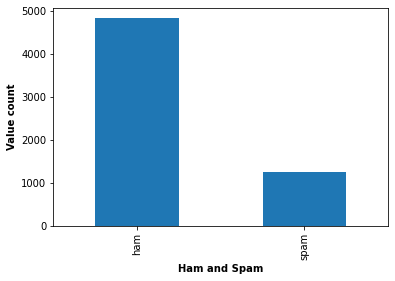

In [6]:
pd.value_counts(data['labels']).plot.bar()
plt.ylabel("Value count", weight='bold')
plt.xlabel("Ham and Spam", weight='bold')
plt.show()

## Using nltk for Lemmatization and Stemming

In [7]:
wordnet = WordNetLemmatizer()

In [8]:
for i in range(len(spam_ham_sms['messages'])):
    capture_words = re.sub('[^a-zA-Z]', ' ', spam_ham_sms['messages'].iloc[i])
    lowering_spliting = capture_words.lower().split()
    remove_word = [wordnet.lemmatize(word) for word in lowering_spliting
             if not word in set(stopwords.words('english'))]

    finalising = ' '.join(remove_word)
    spam_ham_sms['messages'].iloc[i] = finalising

In [9]:
data = pd.get_dummies(spam_ham_sms, columns=['labels'], drop_first=True)
data.head(3)

,messages,labels_spam
0,go jurong point crazy available bugis n great ...,0
1,ok lar joking wif u oni,0
2,free entry wkly comp win fa cup final tkts st ...,1


In [10]:
data_x = np.array(data['messages'])
data_y = np.array(data['labels_spam'])

### Using Countvectorizer

In [11]:
count_vectorizer = CountVectorizer()
x = count_vectorizer.fit_transform(data_x)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, data_y,test_size=0.2, random_state=0)

In [13]:
naive_bayes_classifer = MultinomialNB()
naive_bayes_classifer.fit(x_train, y_train)

MultinomialNB()

In [14]:
y_pred = naive_bayes_classifer.predict(x_test)

0.9766816143497757


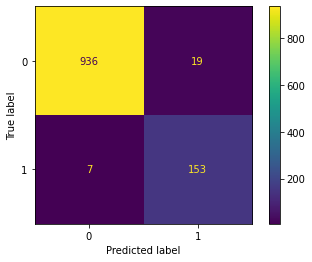

In [15]:
plot_confusion_matrix(naive_bayes_classifer, x_test, y_test)
print(accuracy_score(y_test, y_pred))

### Using Count Vectorizer with para=max_feature

In [16]:
count_vectorizer2 = CountVectorizer(max_features = 5000)

In [17]:
x2 = count_vectorizer2.fit_transform(data_x)

In [18]:
x_train2, x_test_2, y_train2, y_test_2 = train_test_split(x2, data_y, test_size=0.2, random_state=0)

In [22]:
naive_bayes_classifer_2 = MultinomialNB()
naive_bayes_classifer_2.fit(x_train2, y_train2)
y_pred2 = naive_bayes_classifer_2.predict(x_test_2)

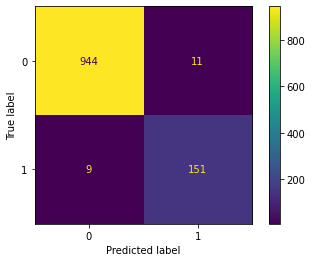

In [24]:
plot_confusion_matrix(naive_bayes_classifer_2, x_test_2, y_test_2)

In [26]:
accuracy_score(y_test_2, y_pred2)

0.9820627802690582

### Using Tfidf

In [27]:
cv = TfidfVectorizer()
x3 = cv.fit_transform(data_x)

In [28]:
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x3, data_y, test_size=0.2, random_state=0)

In [29]:
naive_bayes_classifer_3 = MultinomialNB()
naive_bayes_classifer_3.fit(x_train_3, y_train_3)

MultinomialNB()

In [30]:
y_pred3 = naive_bayes_classifer_3.predict(x_test_3)

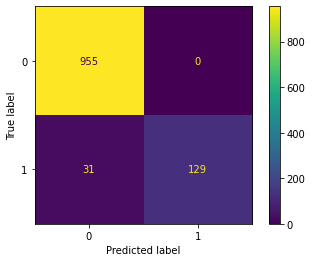

In [31]:
plot_confusion_matrix(naive_bayes_classifer_3, x_test_3, y_test_3);

In [32]:
accuracy_score(y_pred3, y_test_3)

0.9721973094170404

### Precsion and recall

In [44]:
average_precision_1 = average_precision_score(y_test, y_pred)
recall_score_1 = recall_score(y_test, y_pred)
average_precision_2 = average_precision_score(y_test_2, y_pred2)
recall_score_2 = recall_score(y_test_2, y_pred2)
average_precision_3 = average_precision_score(y_test_3, y_pred3)
recall_score_3 = recall_score(y_test_3, y_pred3)

In [45]:
print(average_precision_1);print(recall_score_1);print()
print(average_precision_2);print(recall_score_2);print()
print(average_precision_3);print(recall_score_3)

0.8568957594639691
0.95625

0.8877399587554671
0.94375

0.8340526905829596
0.80625


## Finalizing...

In [57]:
import pickle

In [61]:
filename = 'spam_model.model'
pickle.dump(naive_bayes_classifer_2, open(filename, 'wb'))